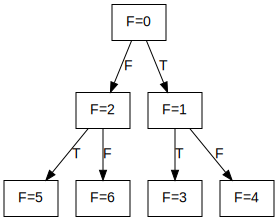

In [1]:
from graphviz import Digraph

dot = Digraph("Tree", node_attr={"shape": "record", "fontname": "helvetica"}, graph_attr={}, edge_attr={"fontname": "helvetica"})
dot.node("1", "F=0")
dot.node("1", "F=0")
dot.edge("1", "3", "F", labeljust="r")
dot.node("2", "F=1")
dot.node("3", "F=2")
dot.edge("1", "2", "T", labeljust="l")
dot.node("4", "F=3")
dot.edge("2", "4", "T", labeljust="l")
dot.node("5", "F=4")
dot.edge("2", "5", "F", labeljust="r")
dot.node("6", "F=5")
dot.edge("3", "6", "T", labeljust="l")
dot.node("7", "F=6")
dot.edge("3", "7", "F", labeljust="r")

dot